## Information Extraction Pipeline

![image](https://miro.medium.com/max/700/1*pHl8XXk0GMo_40rRLRVDqA.png)

#### Coreference resolution

In [1]:
# import Libraries
from nltk.corpus import reuters
import pandas as pd

In [2]:
# Print the categories of reuters dataset
reuters.categories()
# Check for the documents in jobs category.
reuters.fileids(categories=['jobs'])
x = reuters.paras(fileids=['training/9751'])
# printing original list 
print("The original list : " + str(x))

The original list : [[['KEATING', 'REVISES', 'DOWN', 'AUSTRALIAN', 'GROWTH', 'FORECAST', 'Treasurer', 'Paul', 'Keating', 'forecast', 'economic', 'growth', 'at', 'slightly', 'under', 'two', 'pct', 'in', 'the', 'financial', 'year', 'ending', 'June', 'this', 'year', ',', 'down', 'from', 'the', '2', '.', '25', 'pct', 'forecast', 'contained', 'in', 'the', '1986', '/', '87', 'budget', 'delivered', 'last', 'August', '.'], ['Australia', "'", 's', 'terms', 'of', 'trade', 'also', 'fell', ',', 'by', '18', 'pct', ',', 'over', 'the', 'past', 'two', 'years', ',', 'he', 'told', 'Parliament', '.'], ['Terms', 'of', 'trade', 'are', 'the', 'difference', 'between', 'import', 'and', 'export', 'price', 'indexes', '.'], ['Despite', 'the', 'figures', ',', 'the', 'budget', 'forecast', 'of', 'about', '1', '.', '75', 'pct', 'annual', 'growth', 'in', 'employment', 'would', 'be', 'met', ',', 'Keating', 'said', '.'], ['Unemployment', 'is', 'currently', 'at', '8', '.', '2', 'pct', 'of', 'the', 'workforce', '.'], ['"

In [3]:
def get_list_values(text, temp=[]):
    for item in text:
        if type(item) == list:
            temp = get_list_values(item, temp)

        else:
            temp.append(item)

    return temp

 
text = ' '.join(get_list_values(x))
text

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two pct in the financial year ending June this year , down from the 2 . 25 pct forecast contained in the 1986 / 87 budget delivered last August . Australia \' s terms of trade also fell , by 18 pct , over the past two years , he told Parliament . Terms of trade are the difference between import and export price indexes . Despite the figures , the budget forecast of about 1 . 75 pct annual growth in employment would be met , Keating said . Unemployment is currently at 8 . 2 pct of the workforce . " This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said . " We are not pushing this place into a recession . We are not only holding our gains on unemployment , we are bringing unemployment down ," he said , adding that the government had help the country avoid recession .'

In [4]:
text = text.replace(" . ", ".")
text = text.replace(" , ", ",")
text = text.replace("pct","%")
text

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia \' s terms of trade also fell,by 18 %,over the past two years,he told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.Unemployment is currently at 8.2 % of the workforce." This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said." We are not pushing this place into a recession.We are not only holding our gains on unemployment,we are bringing unemployment down ," he said,adding that the government had help the country avoid recession .'

## Text Preprocessing using NEURALCOREF

In [5]:
import spacy
import neuralcoref

# Load SpaCy
nlp = spacy.load('en')
# Add neural coref to SpaCy's pipe
neuralcoref.add_to_pipe(nlp)
def coref_resolution(text):
    """Function that executes coreference resolution on a given text"""
    doc = nlp(text)
    # fetches tokens with whitespaces from spacy document
    
    
    tok_list = list(token.text_with_ws for token in doc) # fetches tokens with whitespaces from spacy document
    for cluster in doc._.coref_clusters:
        cluster_main_words = set(cluster.main.text.split(' ')) # get tokens from representative cluster name
        for coref in cluster:
            if coref!=cluster.main: #if coreference element is not the representative element of that cluster
                if coref.text!=cluster.main.text and bool(set(coref.text.split(' ')).intersection(cluster_main_words))==False: 
                # if coreference element text and representative element text are not equal and none of the coreference element words are in representative element. This was done to handle nested coreference scenarios
                    tok_list[coref.start] = cluster.main.text + doc[coref.end-1].whitespace_
                    for i in range(coref.start+1, coref.end):
                        tok_list[i] = ""     
    return "".join(tok_list)

In [6]:
result = coref_resolution(text)
result

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia \' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.Unemployment is currently at 8.2 % of the workforce." This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said." we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ," Paul Keating said,adding that the government had help Australia avoid recession .'

In [7]:
import spacy
import neuralcoref

nlp = spacy.load('en_core_web_sm')  # load the model
neuralcoref.add_to_pipe(nlp)

doc = nlp(text)  # get the spaCy Doc (composed of Tokens)

print(doc._.coref_clusters)
print("")
# Result: [Eva and Martha: [Eva and Martha, their, they], Jenny: [Jenny, her]]

x = doc._.coref_resolved
print(x)
# Result: "Eva and Martha didn't want Eva and Martha friend Jenny to feel lonely so Eva and Martha invited Jenny to the party."

[Paul Keating: [Paul Keating, he, Keating, " Keating, Keating, he], Australia: [Australia, Australia, the country], This government: [This government, the government], we: [we, We, We, our, we]]

KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Paul Keating said.Unemployment is currently at 8.2 % of the workforce." This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ,Paul Keating Paul Keating said." we are not pushing this place into a recession.we

#### Using `neuralcoref` library by huggingface

In [8]:
import spacy
from spacy import displacy
import en_core_web_sm

# Create an instance of the small pipeline and model from SpaCy
nlp = en_core_web_sm.load()
doc = nlp(result)
displacy.render(doc, jupyter=True, style='ent') 

In [9]:
# Without neuralcoref visualization.
doc = nlp(text)
displacy.render(doc, jupyter=True, style='ent') 

In [10]:
import pandas as pd
doc = nlp(x)

entities = []
labels = []

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels})
df

,Entities,Labels
0,"(Paul, Keating)",PERSON
1,"(two, %)",PERCENT
2,"(the, financial, year, ending, June, this, year)",DATE
3,"(2.25, %)",PERCENT
4,"(1986, /, 87)",DATE
5,"(last, August)",DATE
6,(Australia),GPE
7,"(18, %)",PERCENT
8,"(the, past, two, years)",DATE
9,"(Paul, Keating)",PERSON


#### Splitting the text document into sentences

In [11]:
from spacy.lang.en import English

nlp = English()  # just the language with no model
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
sent = [sent.text for sent in nlp(result).sents]
sent

['KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.',
 "Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.",
 'Terms of trade are the difference between import and export price indexes.',
 'Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.',
 'Unemployment is currently at 8.2 % of the workforce."',
 'This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said."',
 'we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ," Paul Keating said,adding that the government had help Australia avoid recession .']

In [12]:
import pandas as pd

df= pd.DataFrame(columns=["sentence"])

df = df.append(
        [{'sentence' : sent.text} for sent in nlp(result).sents],
        ignore_index=True
    )


In [13]:
df

,sentence
0,KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAS...
1,"Australia ' s terms of trade also fell,by 18 %..."
2,Terms of trade are the difference between impo...
3,"Despite the figures,the budget forecast of abo..."
4,Unemployment is currently at 8.2 % of the work...
5,This government is dragging Australia through ...
6,we are not pushing this place into a recession...


In [14]:
for i in range(0,7):

    x = df.iloc[i][0]
    doc = nlp(x)
    print(x)
    print("")

KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.

Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.

Terms of trade are the difference between import and export price indexes.

Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.

Unemployment is currently at 8.2 % of the workforce."

This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said."

we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ," Paul Keating said,adding that the government had help Australia avoid recession .



In [20]:
entities = []
labels = []
for i in range(0,7):
    
    x = df.iloc[i][0]

    doc = nlp(x)

    for ent in doc.ents:
        entities.append(ent)
        labels.append(ent.label_)

df1 = pd.DataFrame({'Entities':entities,'Labels':labels})
df1

,Entities,Labels


In [21]:
for i in range(0,7):
    
    x = df.iloc[i][0]

    doc = nlp(x)
    print(x)
    for ent in doc.ents:
        print(ent)
        print(ent.label_)

KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.
Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.
Terms of trade are the difference between import and export price indexes.
Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Keating said.
Unemployment is currently at 8.2 % of the workforce."
This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said."
we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ," Paul Keating said,adding that the government had help Australia avoid recession .


In [21]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
subs_synonyms = ['subsidiary', 'unit']
pattern1 = [{'_': {'ref_t': 'ORG'}}, # subject
           {'_': {'ref_t': {'NOT_IN': ['ORG']}},
            'POS': {'NOT_IN': ['VERB']}, 'OP': '*'},
           {'LOWER': {'IN': subs_synonyms}}, {'TEXT': 'of'},
           {'_': {'ref_t': {'NOT_IN': ['ORG']}},
            'POS': {'NOT_IN': ['VERB']}, 'OP': '*'},
           {'_': {'ref_t': 'ORG'}}]  # object
pattern2 = [{'_': {'ref_t': 'ORG'}}, # subject
           {'LOWER': {'IN': subs_synonyms}}, # predicate
           {'_': {'ref_t': 'ORG'}}] # object
matcher.add('subsidiary-of',[pattern1, pattern2])
def extract_rel_match(doc, matcher):
    for sent in doc.sents:
        for match_id, start, end in matcher(sent):
            span = sent[start:end]  # matched span
            pred = nlp.vocab.strings[match_id] # rule name
            subj, obj = span[0], span[-1]
            if pred.startswith('rev-'): # reversed relation
                subj, obj = obj, subj
                pred = pred[4:]
            yield ((subj._.ref_n, subj._.ref_t), pred, 
                   (obj._.ref_n, obj._.ref_t))
def extract_rels(doc):
    yield from extract_rel_match(doc, matcher)
    yield from extract_rel_dep(doc, 'acquires', acq_synonyms, ['to', 'from'])
    yield from extract_rel_dep(doc, 'sells', ['sell'], ['to', 'from'])

In [25]:
doc = nlp(result)

rels = []
for r in extract_rels(doc):   
    rels.append(r)
    print(r)

TypeError: Argument 'doc' has incorrect type (expected spacy.tokens.doc.Doc, got spacy.tokens.span.Span)

In [16]:
import nltk
sentence = sent[1]
print(sentence)

print(nltk.ne_chunk(sentence, binary=True))

Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.


IndexError: string index out of range

In [17]:
import nltk

sentence = sent[1]
print(nltk.ne_chunk(sentence, binary=True))

IndexError: string index out of range

In [152]:
def learnAnaphora():
        sentences = [
            "John is a man. He walks",
            "John and Mary are married. They have two kids",
            "In order for Ravi to be successful, he should follow John",
            "John met Mary in Barista. She asked him to order a Pizza"
        ]

        for sent in sentences:
            chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary=False)
            stack = []
            print(sent)
            items = tree2conlltags(chunks)
            for item in items:
                if item[1] == 'NNP' and (item[2] == 'B-PERSON' or item[2] == 'O'):
                    stack.append((item[0], self.gender(item[0])))
                elif item[1] == 'CC':
                    stack.append(item[0])
                elif item[1] == 'PRP':
                    stack.append(item[0])
            print("\t {}".format(stack)) 

In [51]:
learnAnaphora()

John is a man. He walks


NameError: name 'tree2conlltags' is not defined

In [175]:
import nltk
sent = "China is in Asia"
print(sent)
s = nltk.ne_chunk((nltk.pos_tag(sent.split()))) 
s

China is in Asia


ModuleNotFoundError: No module named 'svgling'

Tree('S', [Tree('GPE', [('China', 'NNP')]), ('is', 'VBZ'), ('in', 'IN'), Tree('GPE', [('Asia', 'NNP')])])

In [149]:
from nltk.tokenize import word_tokenize
text = word_tokenize("Paul works for Microsoft")
x = nltk.pos_tag(text)
x1 = nltk.ne_chunk(x,binary=True)

In [147]:
import re

X = re.compile(r'.*\bin\b(?!\b.+ing)')

for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    #print(doc)
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,corpus='ieer', pattern = X):

        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


In [94]:
import re
X = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.reuters.fileids('jobs'):
    print(doc)
    text = reuters.paras(doc)
    for rel in nltk.sem.extract_rels('ORG','LOC',x,pattern=X):
        print("1")
        print(nltk.sem.rtuple(rel))

test/14867
test/14974
test/15045
test/15365
test/15485
test/16100
test/16158
test/17633
test/18533
test/18539
test/18616
test/18672
test/18987
test/18990
test/18993
test/18996
test/19000
test/19985
test/19986
test/20248
test/21525
training/10135
training/1040
training/11159
training/11160
training/11276
training/12507
training/12534
training/12555
training/12743
training/12752
training/12818
training/14771
training/2000
training/2197
training/2618
training/2746
training/3024
training/3472
training/3520
training/3717
training/4036
training/4091
training/4306
training/4698
training/4700
training/5215
training/5392
training/6158
training/6603
training/6951
training/7004
training/7010
training/7013
training/7070
training/8173
training/867
training/8681
training/8746
training/889
training/895
training/955
training/9751
training/9805
training/9812
training/9834
training/9897


In [143]:
import re
import nltk
from nltk.sem import relextract
from nltk.sem.relextract import extract_rels, rtuple
IN = re.compile(r'.*\bin\b(?!\b.+ing\b)')
for fileid in reuters.fileids():
    for doc in reuters.fileids(categories=['jobs']):
        text1 = reuters.paras(fileids=['training/9751'])
        for rel in relextract.extract_rels('ORG', 'LOC', x1, corpus='conll2002', pattern = IN):
            print(relextract.rtuple(rel))

In [153]:
IN = re.compile(r'.*\bin\b(?!\b.+ing\b)')
text1 = ""
for rel in nltk.sem.extract_rels('PER', 'ORG', , corpus='conll2002', pattern = IN):
    print("1")
    print(relextract.rtuple(rel))

NameError: name 'sentences' is not defined

In [122]:
for rel in nltk.sem.extract_rels('ORG', 'LOC', x1,corpus='conll2002', pattern = IN):

        print(nltk.sem.rtuple(rel))

In [204]:
tagged_sentences = [ nltk.pos_tag(token) for token in tokens]
class doc():
    pass
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
doc.headline=["test headline for sentence"]
for i,sent in enumerate(tagged_sentences):
    doc.text = nltk.ne_chunk(sent)
    for rel in nltk.sem.relextract.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern=IN):
        print(nltk.sem.rtuple(rel))

TypeError: tokens: expected a list of strings, got a string

In [202]:
def extract(sentence):
    import re
    import nltk

    IN = re.compile(r'.*\bin\b(?!\b.+ing)')
    for rel in nltk.sem.extract_rels('ORG', 'LOC', sentence, corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

In [203]:
tokens = ["The Whitehouse in Washington","Paul is from London"]

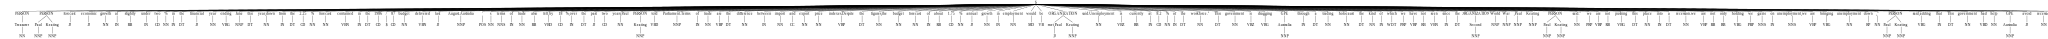

In [205]:
import nltk
import re 
from nltk.chunk import ne_chunk_sents
from nltk.sem import relextract
sent = "Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Paul Keating said.Unemployment is currently at 8.2 % of the workforce.\" This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ,Paul Keating Paul Keating said.\" we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ,\" Paul Keating said,adding that This government had help Australia avoid recession ."
sent = nltk.ne_chunk((nltk.pos_tag(sent.split()))) 
sent

In [198]:
!pip install svgling

     |████████████████████████████████| 66 kB 351 kB/s eta 0:00:011


In [201]:
IN = re.compile (r'.*\bin\b(?!\b.+ing)')
for rel in  nltk.sem.extract_rels('GPE','GPE',sent,corpus='ace',pattern=IN):
    print(nltk.sem.relextract.rtuple(rel))

In [197]:
import re
import nltk
from nltk.sem.relextract import extract_rels, rtuple
from nltk.tokenize import sent_tokenize, word_tokenize

def test():
    sample ="Treasurer Paul Keating forecast economic growth at slightly under two % in the financial year ending June this year,down from the 2.25 % forecast contained in the 1986 / 87 budget delivered last August.Australia ' s terms of trade also fell,by 18 %,over the past two years,Paul Keating told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures,the budget forecast of about 1.75 % annual growth in employment would be met,Paul Keating said.Unemployment is currently at 8.2 % of the workforce.\" This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ,Paul Keating Paul Keating said.\" we are not pushing this place into a recession.we are not only holding we gains on unemployment,we are bringing unemployment down ,\" Paul Keating said,adding that This government had help Australia avoid recession ."

    sentences = sent_tokenize(sample)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.tag.pos_tag(sentence) for sentence in tokenized_sentences]

    IN = re.compile (r'.*\bin\b(?!\b.+ing)')
    OF = re.compile(r'.*\bof\b.*')

    for i, sent in enumerate(tagged_sentences):
        sent = nltk.chunk.ne_chunk(sent) # ne_chunk method expects one tagged sentence
        print(sent)
        rels = extract_rels('ORG', 'CARDINAL', sent, corpus='ieer', pattern={IN,OF}) 
        for rel in rels:
            print("1")
            print(nltk.sem.rtuple(rel))
            print('{0:<5}{1}'.format(i, rtuple(rel)))
test()

(S
  (PERSON Treasurer/NN)
  (PERSON Paul/NNP Keating/NNP)
  forecast/JJ
  economic/JJ
  growth/NN
  at/IN
  slightly/RB
  under/IN
  two/CD
  %/NN
  in/IN
  the/DT
  financial/JJ
  year/NN
  ending/VBG
  June/NNP
  this/DT
  year/NN
  ,/,
  down/RB
  from/IN
  the/DT
  2.25/CD
  %/NN
  forecast/NN
  contained/VBN
  in/IN
  the/DT
  1986/CD
  //$
  87/CD
  budget/NN
  delivered/VBN
  last/JJ
  August.Australia/NNP
  '/POS
  s/NN
  terms/NNS
  of/IN
  trade/NN
  also/RB
  fell/VBD
  ,/,
  by/IN
  18/CD
  %/NN
  ,/,
  over/IN
  the/DT
  past/JJ
  two/CD
  years/NNS
  ,/,
  (PERSON Paul/NNP Keating/NNP)
  told/VBD
  Parliament.Terms/NNP
  of/IN
  trade/NN
  are/VBP
  the/DT
  difference/NN
  between/IN
  import/NN
  and/CC
  export/NN
  price/NN
  indexes.Despite/VBP
  the/DT
  figures/NNS
  ,/,
  the/DT
  budget/NN
  forecast/NN
  of/IN
  about/RB
  1.75/CD
  %/NN
  annual/JJ
  growth/NN
  in/IN
  employment/NN
  would/MD
  be/VB
  met/VBN
  ,/,
  (PERSON Paul/NNP Keating/NNP)
  said.Une

AttributeError: 'Tree' object has no attribute 'text'